In [3]:
import pandas as pd

# load dataset
Input_Data = pd.read_csv("Insurance_Data.csv")

## Exploring the Dataset

In [4]:
Input_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249169 entries, 0 to 249168
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Complaint number         249169 non-null  int64 
 1   Complaint filed against  249169 non-null  object
 2   Complaint filed by       249169 non-null  object
 3   Reason complaint filed   249163 non-null  object
 4   Confirmed complaint      249169 non-null  object
 5   How resolved             248141 non-null  object
 6   Received date            249169 non-null  object
 7   Closed date              249169 non-null  object
 8   Complaint type           249168 non-null  object
 9   Coverage type            249169 non-null  object
 10  Coverage level           249169 non-null  object
 11  Others involved          220978 non-null  object
 12  Respondent ID            249169 non-null  int64 
 13  Respondent Role          249167 non-null  object
 14  Respondent type     

In [5]:
Input_Data.head()

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords
0,1,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,06/12/2012,07/25/2012,"Life, Accident and Health",Life & Annuity,Individual Life,NaN,13191,Ins Co - Licensed/Active,Organization,INDV,NaN
1,2,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,06/21/2012,08/01/2012,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,NaN
2,3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/11/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
3,4,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/28/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
4,5,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Contract Language/Legal Issue; Question of Fact,06/13/2012,07/17/2012,Property and Casualty,Automobile,Individual Private Pass,NaN,2918,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...


In [6]:
Null_data=Input_Data.isnull().sum()
Null_data

Complaint number               0
Complaint filed against        0
Complaint filed by             0
Reason complaint filed         6
Confirmed complaint            0
How resolved                1028
Received date                  0
Closed date                    0
Complaint type                 1
Coverage type                  0
Coverage level                 0
Others involved            28191
Respondent ID                  0
Respondent Role                2
Respondent type                0
Complainant type               0
Keywords                   49540
dtype: int64

In [7]:
Input_Data = Input_Data.dropna(thresh=Input_Data.shape[1]-1)

In [8]:
Null_data=Input_Data.isnull().sum()
Null_data

Complaint number               0
Complaint filed against        0
Complaint filed by             0
Reason complaint filed         1
Confirmed complaint            0
How resolved                 469
Received date                  0
Closed date                    0
Complaint type                 0
Coverage type                  0
Coverage level                 0
Others involved            17858
Respondent ID                  0
Respondent Role                0
Respondent type                0
Complainant type               0
Keywords                   38973
dtype: int64

In [9]:

distinct_keywords = Input_Data["Keywords"].unique()

# Count the number of distinct values
num_distinct_keywords = len(distinct_keywords)
print("Number of distinct values in the Keywords column:", num_distinct_keywords)


Number of distinct values in the Keywords column: 7403


In [10]:
# Print distinct values and their counts in the 'How resolved' column
resolved_unique_values = Input_Data['How resolved'].unique()
print("Distinct values in 'How resolved' column:")
print(resolved_unique_values)
print("Number of unique values:", len(resolved_unique_values))

# Print distinct values and their counts in the 'Others Involved' column
others_involved_unique_values = Input_Data['Others involved'].unique()
print("\nDistinct values in 'Others Involved' column:")
print(others_involved_unique_values)
print("Number of unique values:", len(others_involved_unique_values))

# Print distinct values and their counts in the 'Keywords' column
keywords_unique_values = Input_Data['Keywords'].unique()
print("\nDistinct values in 'Keywords' column:")
print(keywords_unique_values)
print("Number of unique values:", len(keywords_unique_values))


Distinct values in 'How resolved' column:
['Information Furnished' 'Contract Language/Legal Issue; Question of Fact'
 'Claim Settled; Question of Fact' ...
 'Complaint Withdrawn; Company Position Upheld; Information Furnished'
 'Agent 1st warning; Information Furnished; Failure to Timely Respond'
 'Corrective Action Taken; Company Position Upheld; Question of Fact']
Number of unique values: 3898

Distinct values in 'Others Involved' column:
['Insured' nan 'GR Elected Official; Insured' ...
 'Associated Subject Company; Associated Subject Person; Correspondent Company; Insured; Portal - Agent/Adjuster; Portal - Insured'
 'Portal - Agency; Portal - Agent/Adjuster; Portal - Attorney; Portal - Company; Portal - Other Company'
 'Associated Subject Company; Associated Subject Person; Insured; Portal - Agency; Portal - Agent/Adjuster; Portal - Attorney; Portal - Company; Portal - Insured; Portal - Other Company']
Number of unique values: 6841

Distinct values in 'Keywords' column:
[nan
 "2012

In [11]:
# Assuming Input_Data is your DataFrame

# Create a pivot table for the 'How resolved' column
how_resolved_pivot = pd.pivot_table(Input_Data, index='How resolved', aggfunc='size')

# Create a pivot table for the 'Others Involved' column
others_involved_pivot = pd.pivot_table(Input_Data, index='Others involved', aggfunc='size')

# Create a pivot table for the 'Keywords' column
keywords_pivot = pd.pivot_table(Input_Data, index='Keywords', aggfunc='size')

# Print the pivot tables
print("Pivot table for 'How resolved' column:")
print(how_resolved_pivot)
print("\nPivot table for 'Others Involved' column:")
print(others_involved_pivot)
print("\nPivot table for 'Keywords' column:")
print(keywords_pivot)


Pivot table for 'How resolved' column:
How resolved
Additional Monies Received                                                            4175
Additional Monies Received; Additional Payment Expected                                218
Additional Monies Received; Additional Payment Expected; Appraisal Process Invoked       1
Additional Monies Received; Additional Payment Expected; Claim Settled                   7
Additional Monies Received; Additional Payment Expected; Company Position Upheld         6
                                                                                      ... 
Taxes Paid                                                                               2
Taxes Paid; Additional Monies Received; Information Furnished                            1
Taxes Paid; Claim Settled                                                                1
Taxes Paid; Information Furnished                                                        1
Taxes Paid; Information Furnished; Add

In [12]:
# Impute missing values in 'How resolved' column with mode
mode_reason_complaint_filed = Input_Data['How resolved'].mode()[0]
Input_Data['How resolved'] = Input_Data['How resolved'].fillna(mode_reason_complaint_filed)

# Impute missing values in 'Others involved' column with mode
mode_complaint_type = Input_Data['Others involved'].mode()[0]
Input_Data['Others involved'] = Input_Data['Others involved'].fillna(mode_complaint_type)

# Impute missing values in 'Keywords' column with mode
mode_respondent_role = Input_Data['Keywords'].mode()[0]
Input_Data['Keywords'] = Input_Data['Keywords'].fillna(mode_respondent_role)

# Impute missing values in 'Reason complaint filed' column with mode
mode_respondent_role = Input_Data['Reason complaint filed'].mode()[0]
Input_Data['Reason complaint filed'] = Input_Data['Reason complaint filed'].fillna(mode_respondent_role)

In [13]:
null_d=Input_Data.isnull().sum()
null_d

Complaint number           0
Complaint filed against    0
Complaint filed by         0
Reason complaint filed     0
Confirmed complaint        0
How resolved               0
Received date              0
Closed date                0
Complaint type             0
Coverage type              0
Coverage level             0
Others involved            0
Respondent ID              0
Respondent Role            0
Respondent type            0
Complainant type           0
Keywords                   0
dtype: int64

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Selecting only numerical columns
numerical_columns = Input_Data.select_dtypes(include=['int64', 'float64']).columns

# Plotting the scatter matrix for numerical columns
scatter_matrix(Input_Data[numerical_columns], figsize=(15, 12))
plt.show()

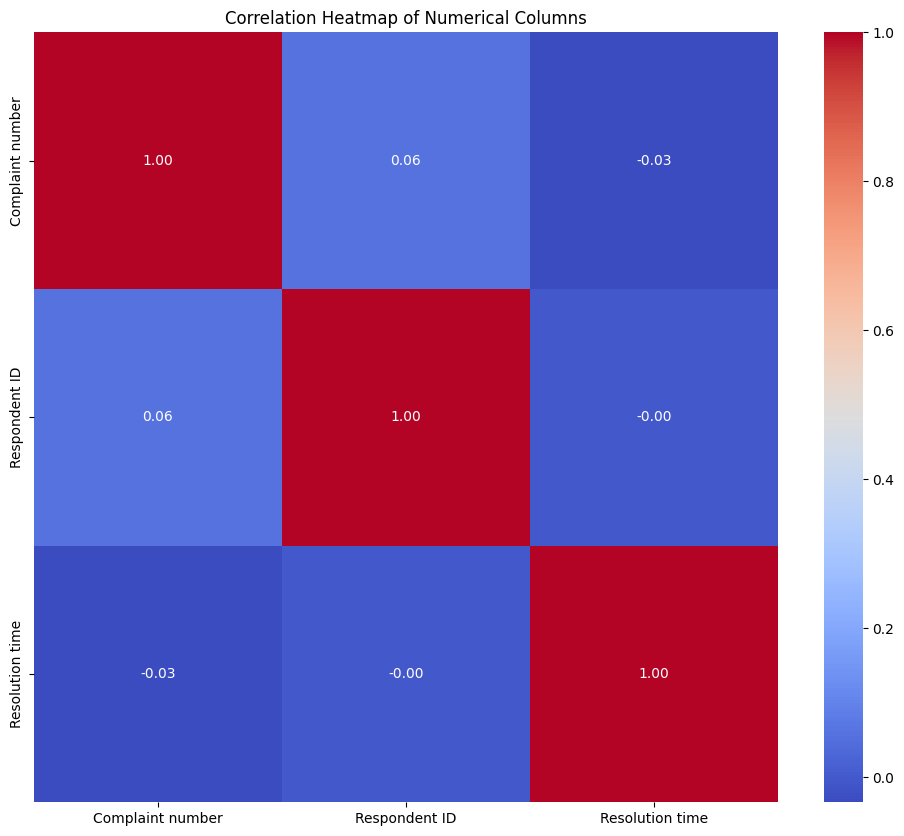

In [ ]:
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = Input_Data[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


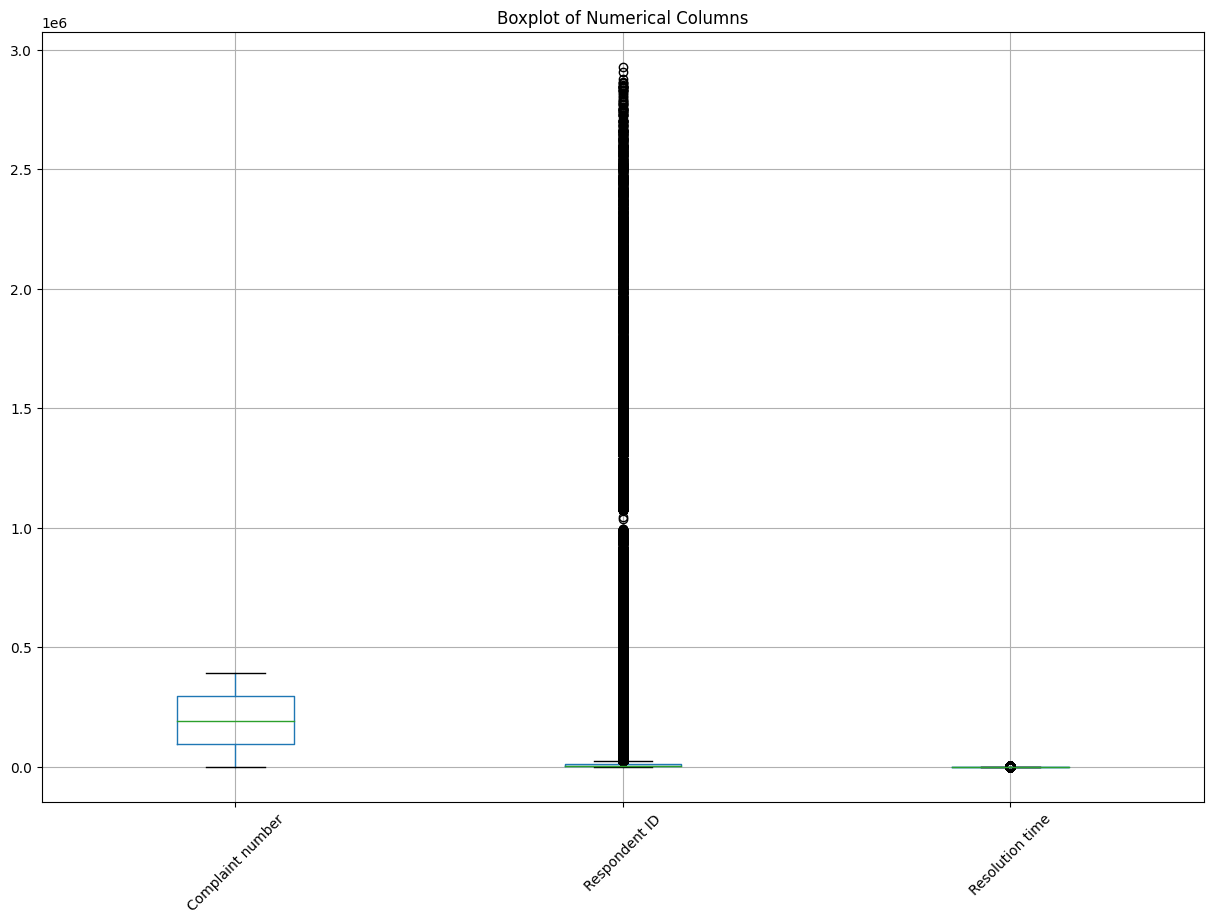

In [ ]:
# Plotting boxplots for numerical columns
plt.figure(figsize=(15, 10))
Input_Data[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()



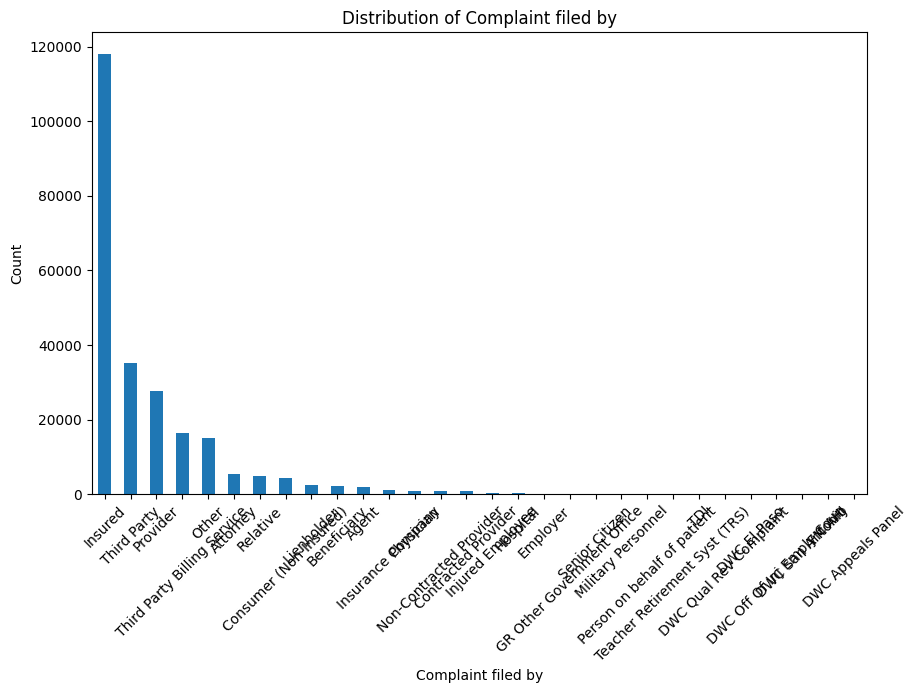

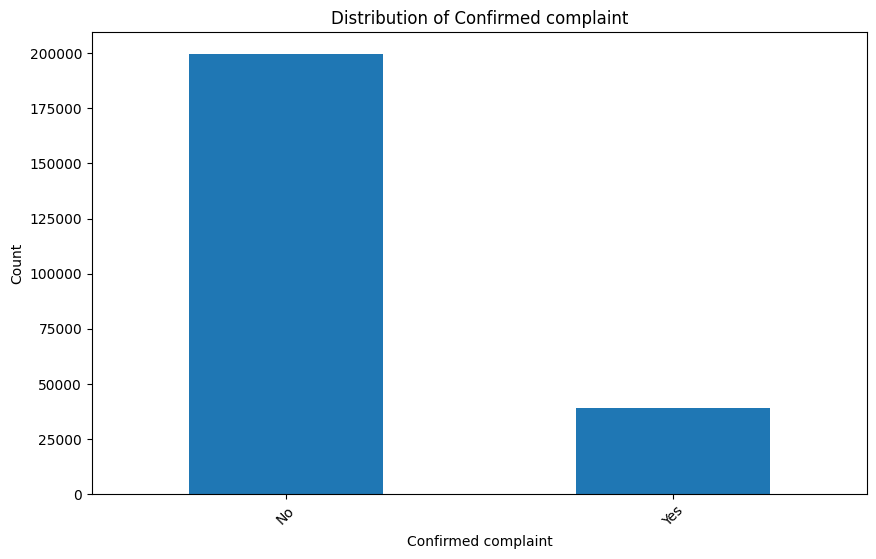

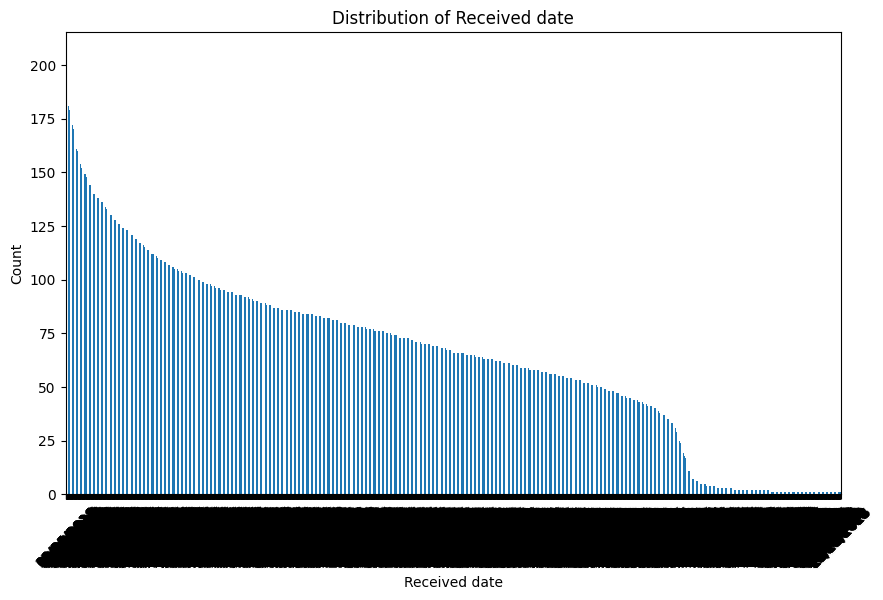

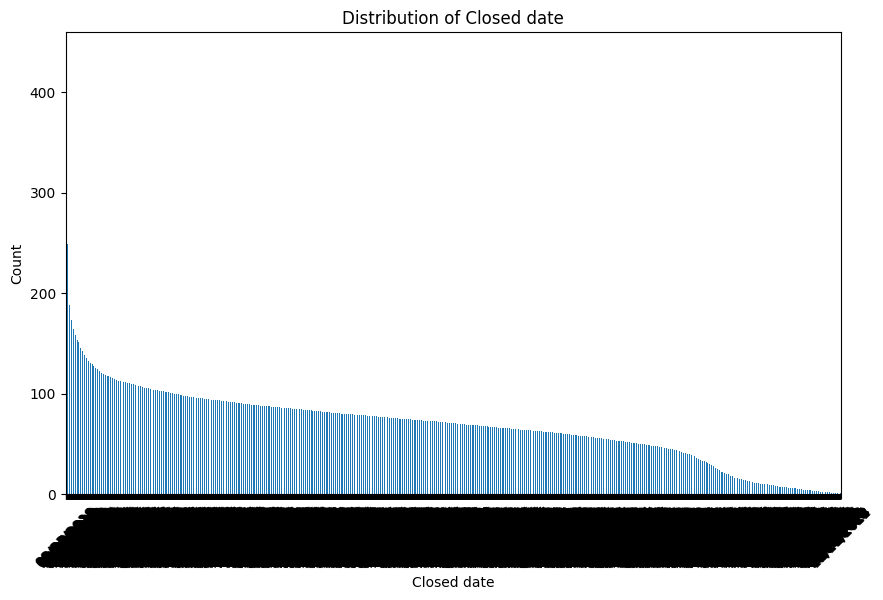

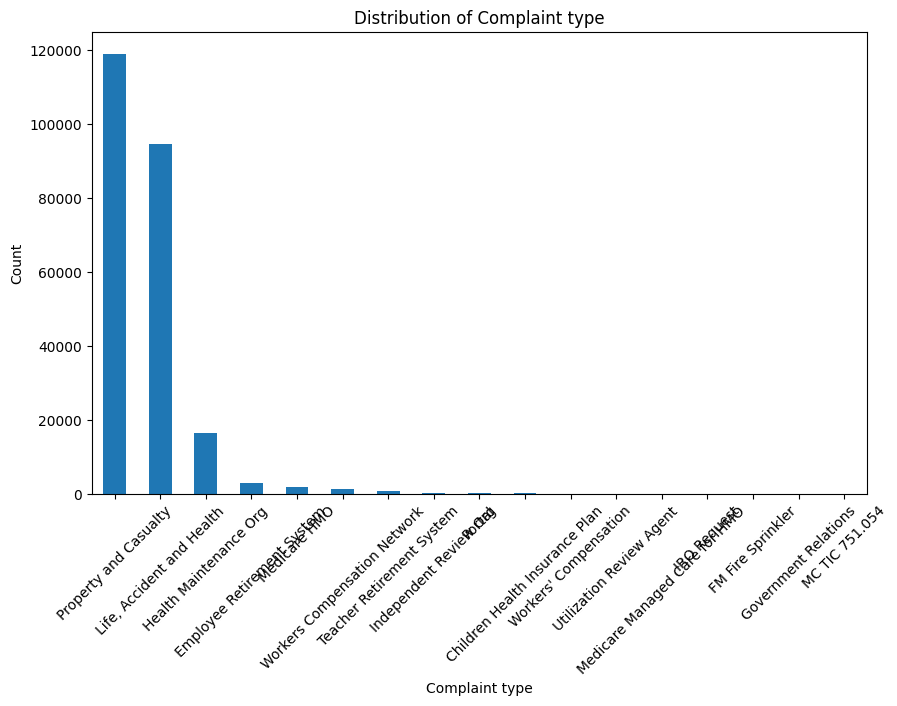

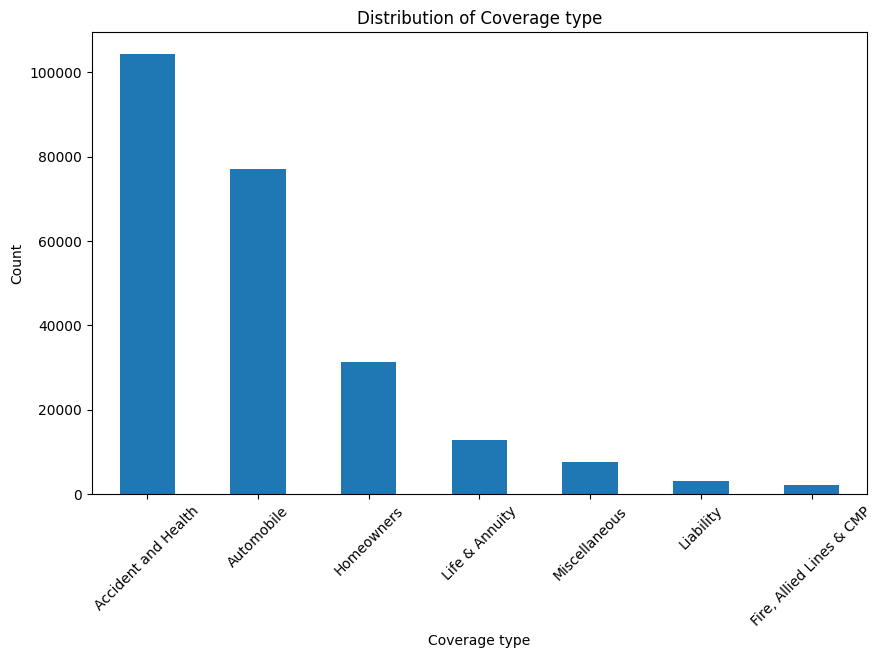

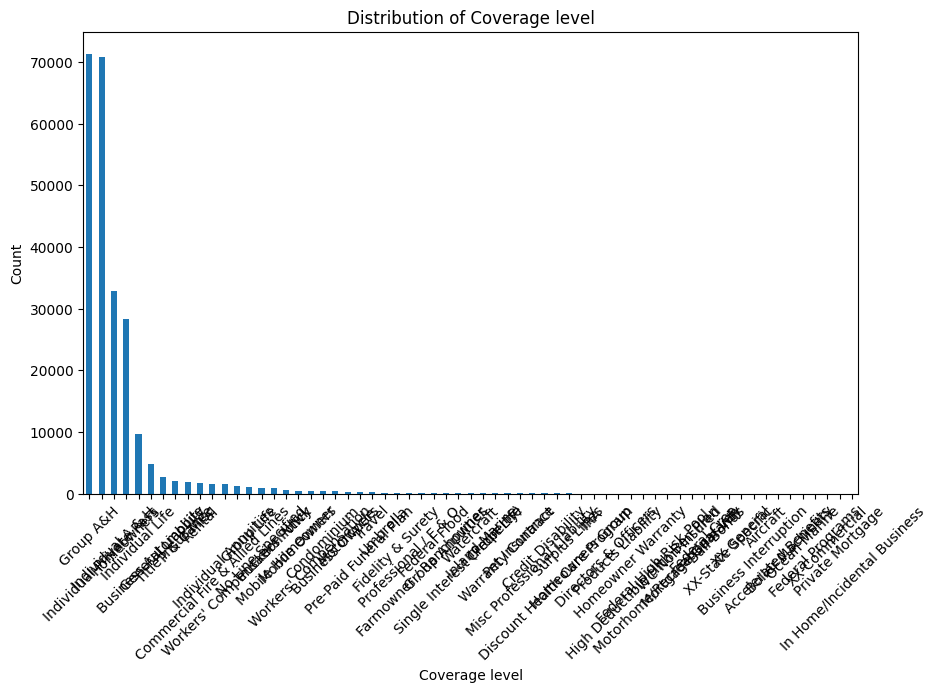

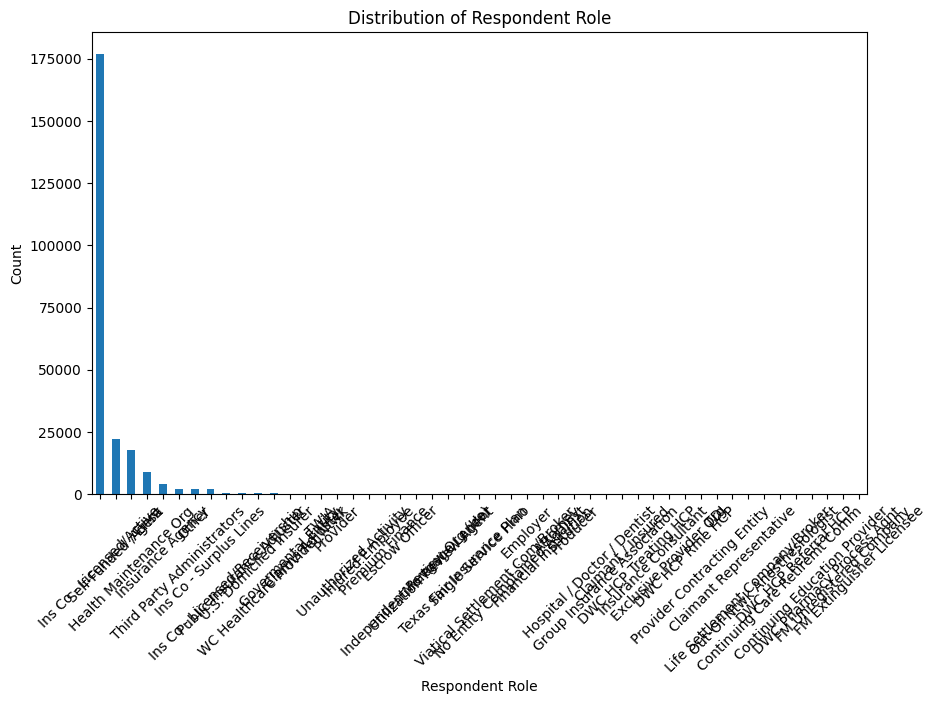

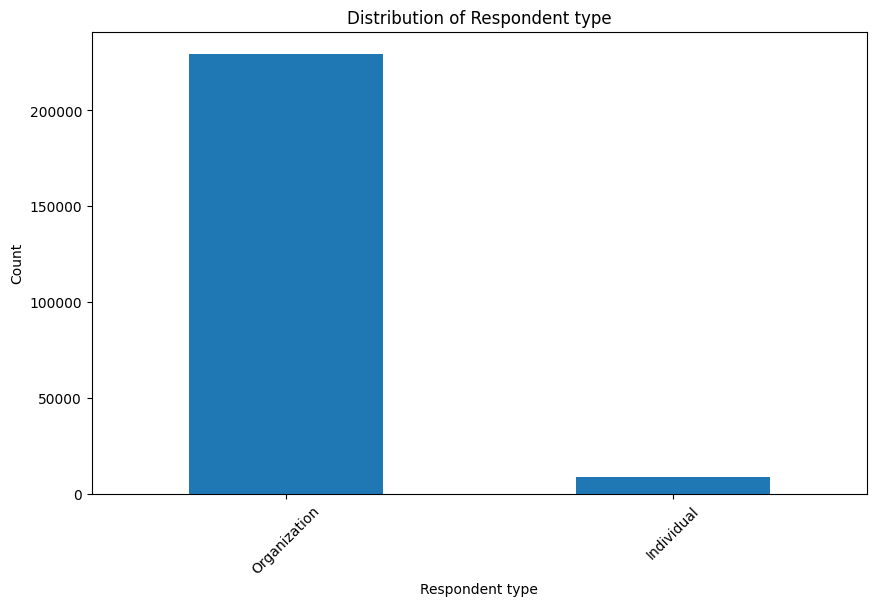

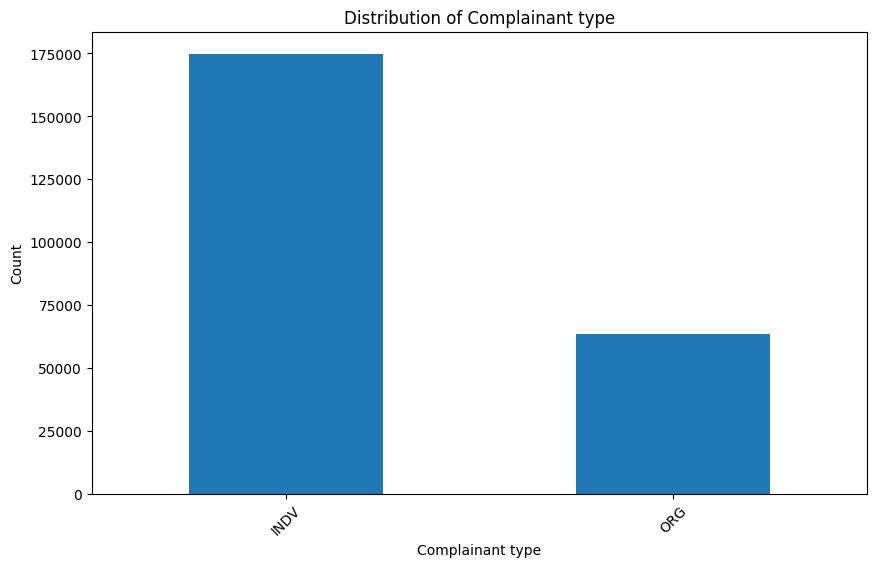

In [ ]:
categorical_columns = Input_Data.select_dtypes(include=['object']).columns

# Define columns to exclude from plotting
columns_to_exclude = ['Keywords', 'Others involved', 'How resolved', 'Reason complaint filed', 'Complaint filed against']

for column in categorical_columns:
    # Skip columns in the exclusion list
    if column in columns_to_exclude:
        continue

    plt.figure(figsize=(10, 6))
    Input_Data[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


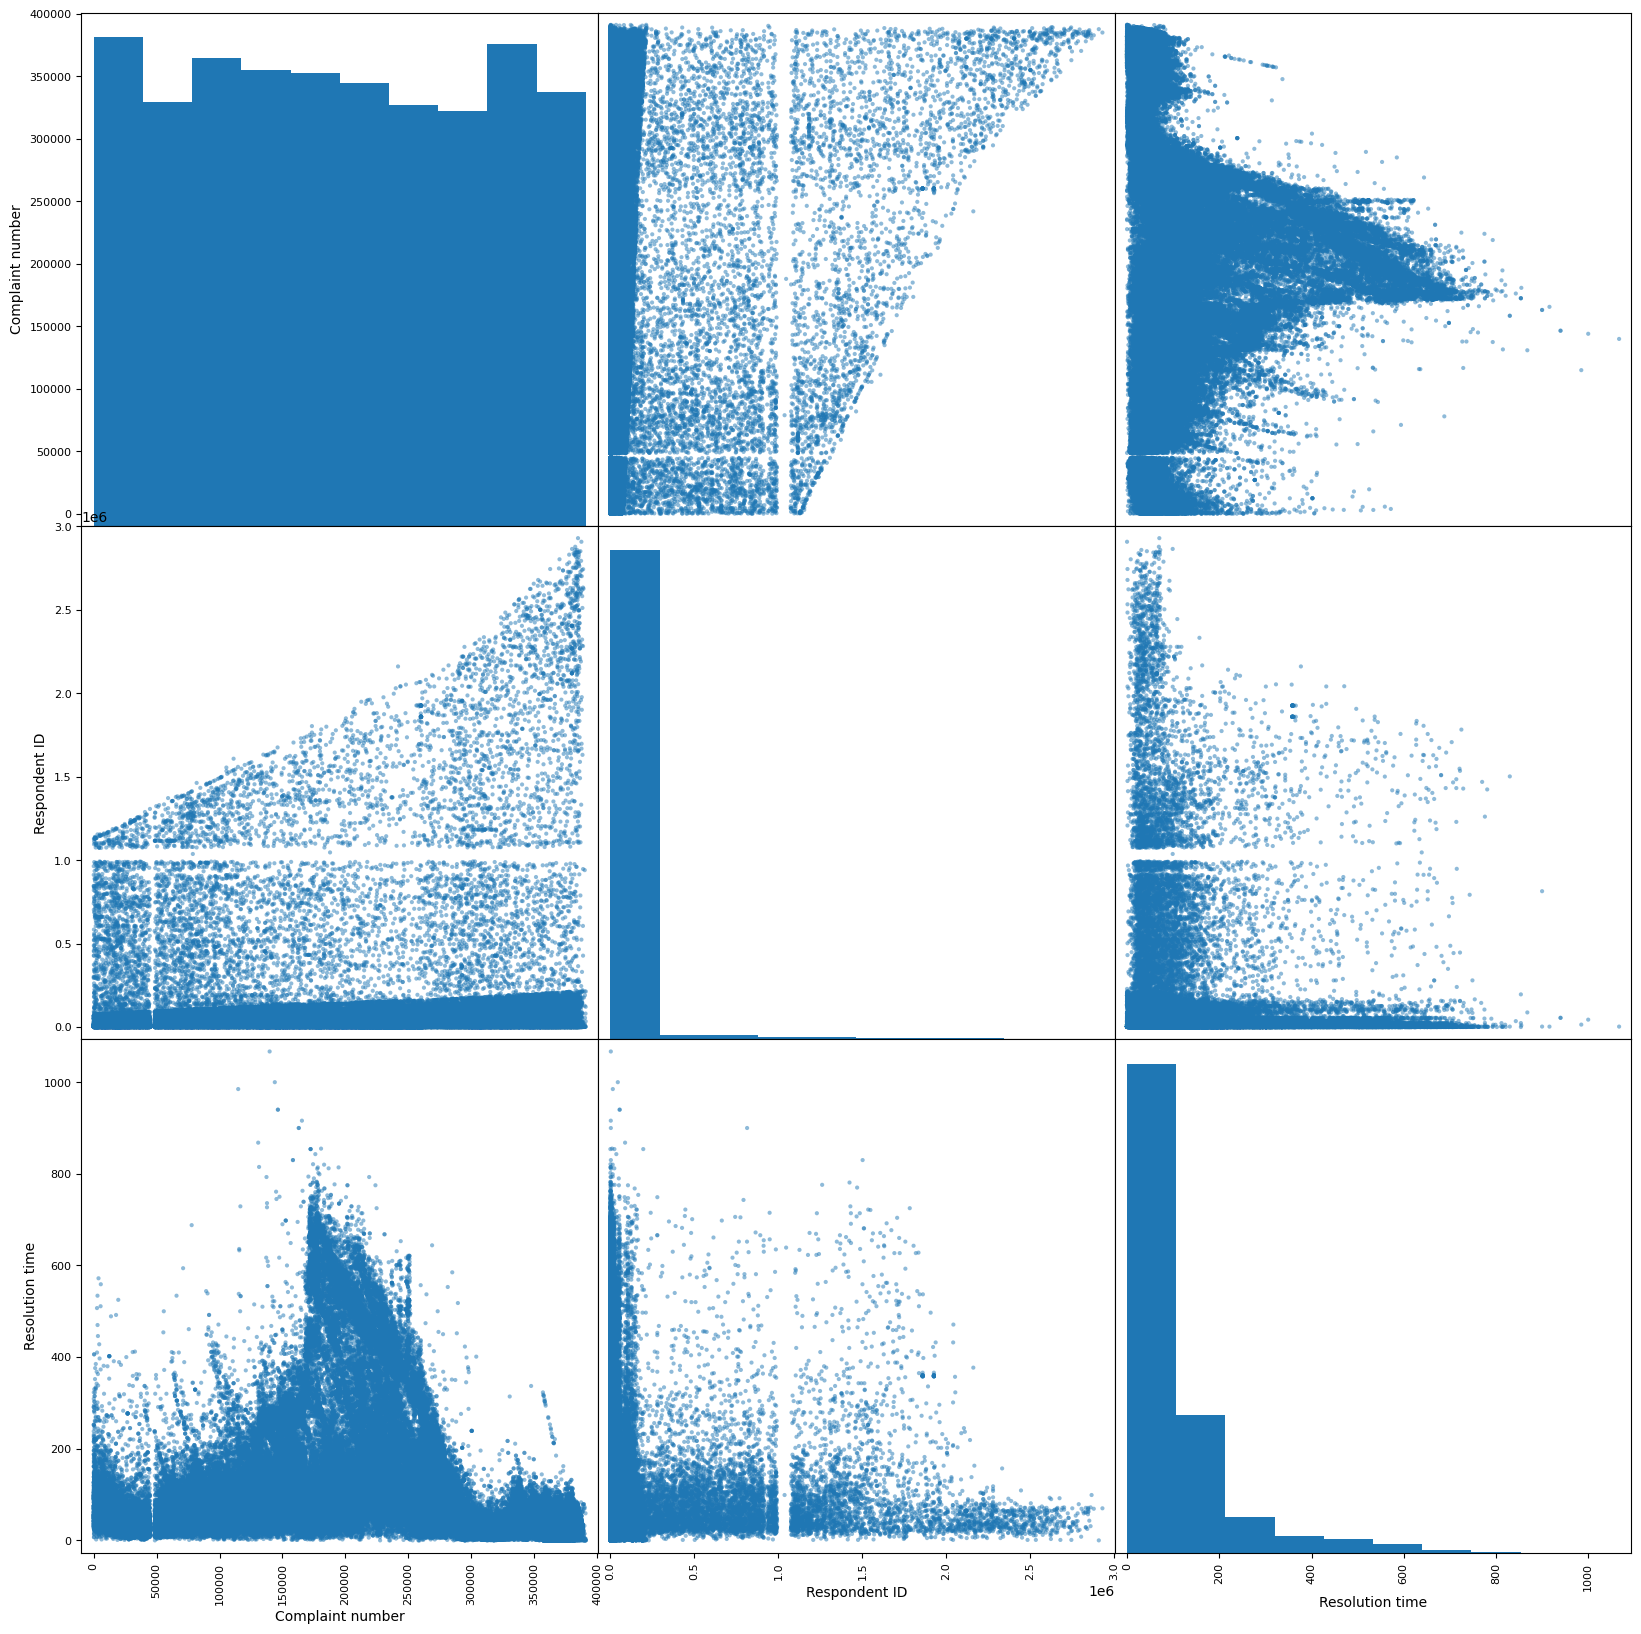

In [ ]:
from pandas.plotting import scatter_matrix

# Plotting the scatter matrix for all columns
scatter_matrix(Input_Data, figsize=(20, 20))
plt.show()


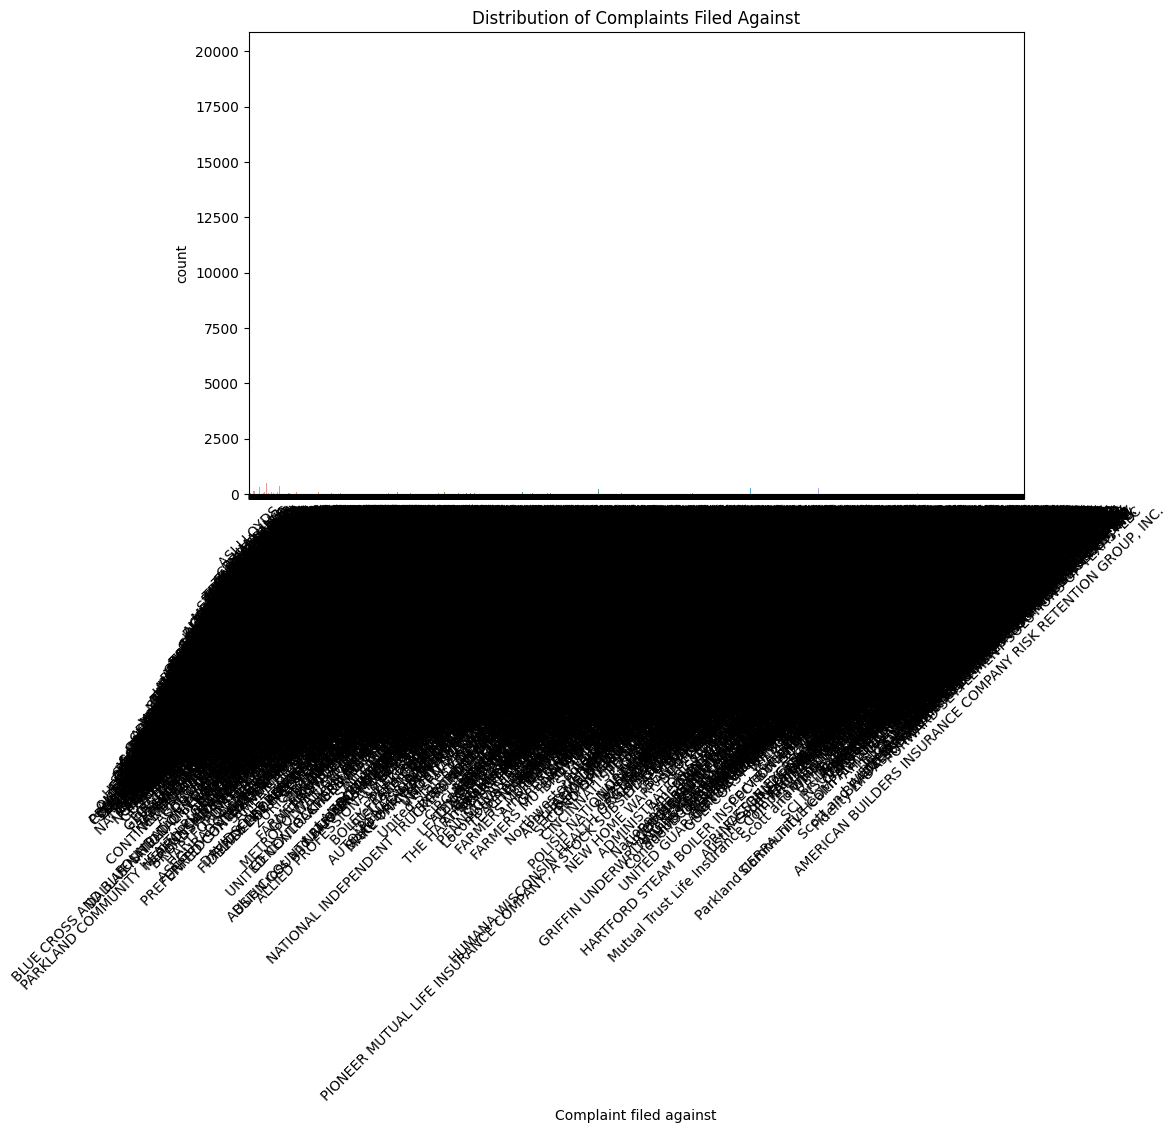

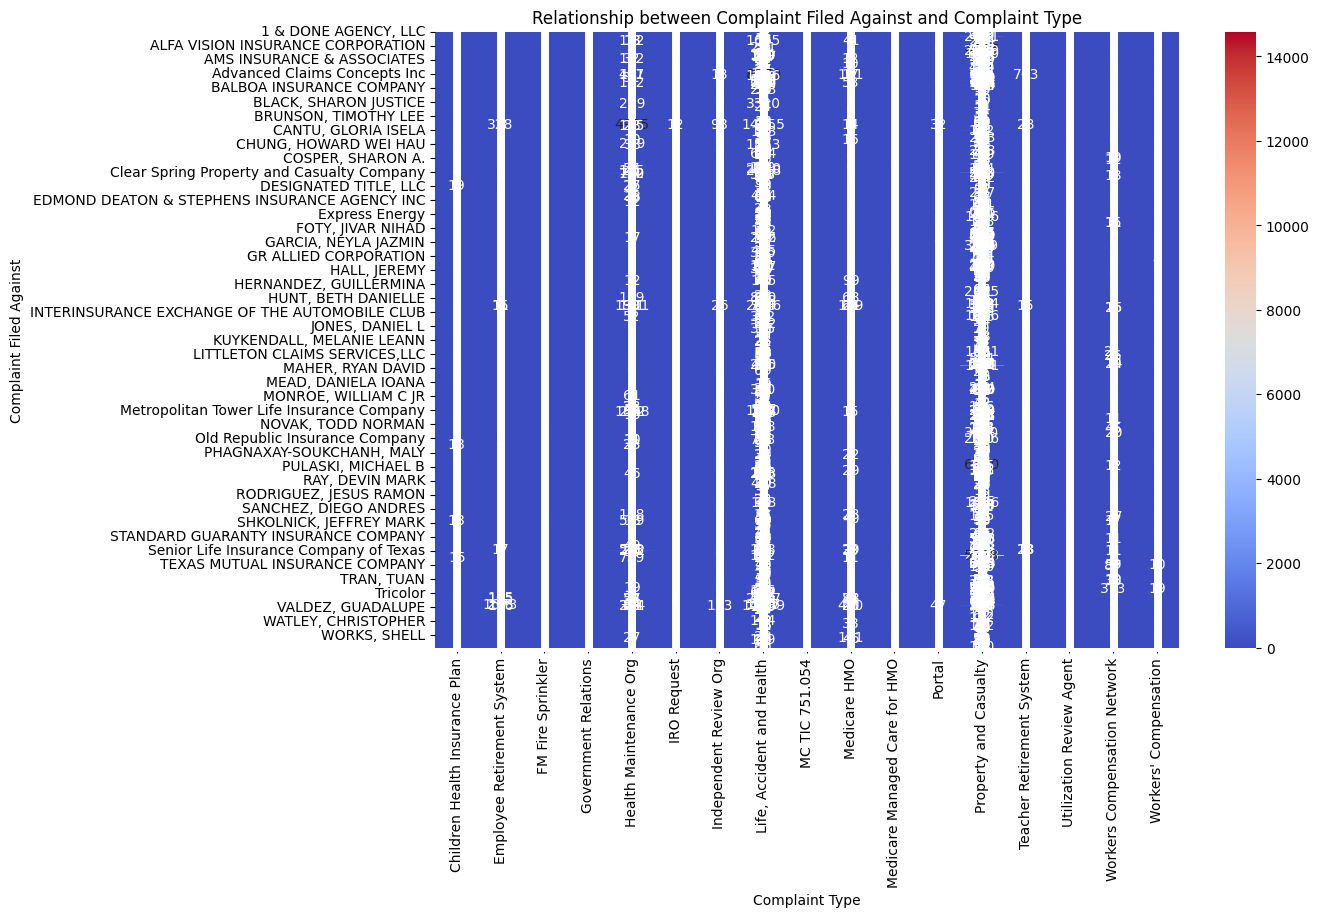

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



cross_tab = pd.crosstab(Input_Data['Complaint filed against'], Input_Data['Complaint type'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Relationship between Complaint Filed Against and Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Filed Against')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation between 'Complaint filed against' and 'Reason complaint filed'
cross_tab = pd.crosstab(Input_Data['Complaint filed against'], Input_Data['Reason complaint filed'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Correlation between Complaint Filed Against and Reason Complaint Filed')
plt.xlabel('Reason Complaint Filed')
plt.ylabel('Complaint Filed Against')
plt.show()

In [ ]:
from datetime import datetime

Input_Data["Received date"] = pd.to_datetime(Input_Data["Received date"])
Input_Data["Closed date"] = pd.to_datetime(Input_Data["Closed date"])

# Calculate frequency of complaints filed against each company
complaint_frequency = Input_Data["Complaint filed against"].value_counts()

# Calculate average resolution time for each company
Input_Data["Resolution time"] = (Input_Data["Closed date"] - Input_Data["Received date"]).dt.days
average_resolution_time = Input_Data.groupby("Complaint filed against")["Resolution time"].mean()

# Print the results
print("Frequency of complaints filed against each company:")
print(complaint_frequency)
print("\nAverage resolution time for each company:")
print(average_resolution_time)

Frequency of complaints filed against each company:
Complaint filed against
Blue Cross and Blue Shield of Texas, A Division of Health Care Service Corporation    20056
UnitedHealthcare Insurance Company                                                    15245
Aetna Life Insurance Company                                                           9246
PROGRESSIVE COUNTY MUTUAL INSURANCE COMPANY                                            6667
State Farm Mutual Automobile Insurance Company                                         5400
                                                                                      ...  
Texas Farmers Insurance Company, Inc.                                                     1
SCHKADE-HILL, KIMBERLEY ANN                                                               1
WEHRLY, JOSEPH WILLIAM                                                                    1
THOMAS, FRED ALAN                                                                         1
WELL

In [ ]:
# Get the top 10 companies based on complaint frequency
top_10_companies = Input_Data['Complaint filed against'].value_counts().head(10)

# Create a dataframe for the top 10 companies
top_10_companies_df = pd.DataFrame({'Company': top_10_companies.index, 'Frequency': top_10_companies.values})

# Code for the bar plot (top 10 companies)
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Company', data=top_10_companies_df, palette='Purples')
plt.title('Top 10 Companies - Complaint Frequency')
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.show()


In [ ]:
# Calculate the difference in days between Received date and Closed date
Input_Data['Days_to_Resolve'] = (Input_Data['Closed date'] - Input_Data['Received date']).dt.days

# Plot the correlation between Days_to_Resolve and another variable (e.g., Complaint number)
plt.figure(figsize=(12, 8))
sns.regplot(x='Days_to_Resolve', y='Complaint number', data=Input_Data, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'orange'})
plt.title('Correlation between Days to Resolve and Complaint Number')
plt.xlabel('Days to Resolve')
plt.ylabel('Complaint Number')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot frequency of complaints filed against each company
plt.figure(figsize=(12, 6))
complaint_frequency.plot(kind='bar')
plt.title('Frequency of Complaints Filed Against Each Company')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average resolution time for each company
plt.figure(figsize=(12, 6))
average_resolution_time.plot(kind='bar')
plt.title('Average Resolution Time for Each Company')
plt.xlabel('Company')
plt.ylabel('Average Resolution Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Randomly sample 100,000 records from Input_Data
sampled_df = Input_Data.sample(n=10000, random_state=42)

# Save the sampled DataFrame to a new variable or file if needed


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Copy the Input_Data dataframe to avoid modifying the original data
data = sampled_df.copy()

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Reason complaint filed'])
y = data['Reason complaint filed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.267


In [17]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Convert scores to percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
f1_percent = f1 * 100

print("Accuracy:", accuracy_percent, "%")
print("Precision:", precision_percent, "%")
print("F1 Score:", f1_percent, "%")

# Additional: Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 26.700000000000003 %
Precision: 20.39458694960614 %
F1 Score: 22.447379137794456 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         3
          41       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         1
          57     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
#from scipy.stats import cramers_v

# Load your dataset
#data = pd.read_csv("your_dataset.csv")

# Select categorical columns and target variable
categorical_columns = ['Complaint filed against', 'Complaint filed by', 'How resolved', 'Complaint type', 'Coverage type', 'Coverage level', 'Others involved', 'Respondent Role', 'Respondent type', 'Complainant type', 'Keywords', 'Reason complaint filed']

# Remove 'Reason complaint filed' from the list of categorical columns
categorical_columns.remove('Reason complaint filed')

# Create a DataFrame to store correlation values
correlation_data = pd.DataFrame(index=categorical_columns, columns=['Chi-Square P-value', "Cramer's V"])

# Calculate correlation for each categorical variable
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(Input_Data[column], Input_Data['Reason complaint filed'])

    # Chi-square test for independence
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Cramer's V statistic
    num_categories = contingency_table.shape[0]
    cramer_v = np.sqrt(chi2 / (Input_Data.shape[0] * (min(contingency_table.shape) - 1)))

    # Store the results in the correlation DataFrame
    correlation_data.loc[column, 'Chi-Square P-value'] = p
    correlation_data.loc[column, "Cramer's V"] = cramer_v

# Print correlation data
print(correlation_data)


                        Chi-Square P-value Cramer's V
Complaint filed against                0.0   0.297292
Complaint filed by                     0.0   0.495497
How resolved                           0.0   0.308368
Complaint type                         0.0   0.441097
Coverage type                          0.0   0.446813
Coverage level                         0.0   0.280307
Others involved                        0.0   0.246934
Respondent Role                        0.0   0.318062
Respondent type                        0.0   0.688168
Complainant type                       0.0   0.488514
Keywords                               0.0   0.251631


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Load the dataset


# Select only the effective columns
selected_columns = ["Complaint filed by", "Complaint type", "Coverage type", "Complainant type", "Reason complaint filed"]
data = Input_Data[selected_columns]

# Drop rows with any missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ["Complaint filed by", "Complaint type", "Coverage type", "Complainant type", "Reason complaint filed"]:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=["Reason complaint filed"])
y = data["Reason complaint filed"]

# Convert target variable to one-hot encoded vectors
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


<ipython-input-23-020102c89199>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-23-020102c89199>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
<ipython-input-23-020102c89199>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Epoch 1/3
951/951 [==============================] - 15s 14ms/step - loss: 4.6649 - accuracy: 0.1386 - val_loss: 4.2325 - val_accuracy: 0.1701
Epoch 2/3
951/951 [==============================] - 11s 12ms/step - loss: 4.3400 - accuracy: 0.1488 - val_loss: 4.1913 - val_accuracy: 0.1418
Epoch 3/3
595/595 [==============================] - 3s 4ms/step - loss: 4.1415 - accuracy: 0.1604
Test Accuracy: 16.04%


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Convert scores to percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
f1_percent = f1 * 100

print("Accuracy:", accuracy_percent, "%")
print("Precision:", precision_percent, "%")
print("F1 Score:", f1_percent, "%")

Accuracy: 15.5 %
Precision: 4.8467122283655835 %
F1 Score: 6.675425368887638 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
# data = pd.read_csv("your_dataset.csv")

# Select the input features and target variable
X = sampled_df.drop(columns=["Complaint filed against"])
y = sampled_df["Complaint filed against"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical variables with handling unknown categories
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert sparse matrix to dense array
X_train_encoded_dense = X_train_encoded.toarray()
X_test_encoded_dense = X_test_encoded.toarray()

# Train the Naive Bayes classifier
classifier = CategoricalNB()
classifier.fit(X_train_encoded_dense, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_encoded_dense)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.1165
Precision: 0.06417685443220268
Recall: 0.1165
F1 Score: 0.047139643599793044


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the Input_Data dataframe to avoid modifying the original data
data = sampled_df.copy()

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Complaint filed against'])
y = data['Complaint filed against']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6515

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.74      0.97      0.84        29
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          28       1.00      1.00      1.00        11
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          36       0.00      0.00      

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Convert scores to percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
f1_percent = f1 * 100

print("Accuracy:", accuracy_percent, "%")
print("Precision:", precision_percent, "%")
print("F1 Score:", f1_percent, "%")

Accuracy: 65.14999999999999 %
Precision: 58.617715919854554 %
F1 Score: 60.5210195565312 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


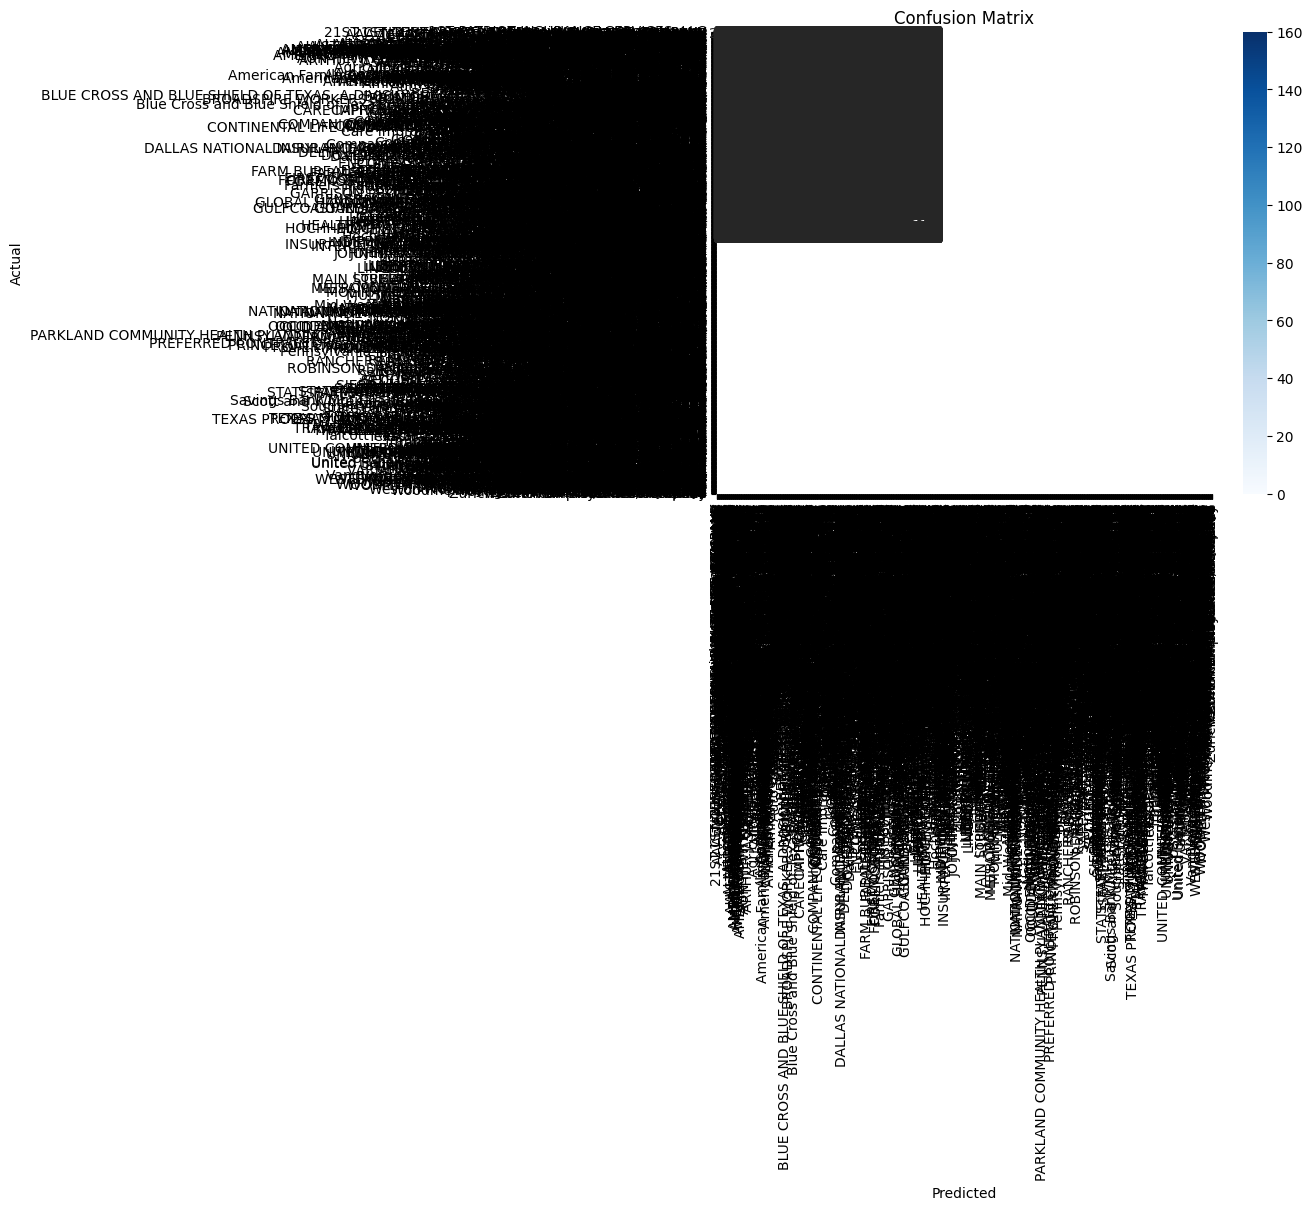

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoders['Complaint filed against'].classes_,
            yticklabels=label_encoders['Complaint filed against'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()